# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 566


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
#change the city everytime        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | khandyga
Processing Record 4 of Set 1 | keflavik
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | papao
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | dawei
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | sanming
Processing Record 14 of Set 1 | vorgashor
Processing Record 15 of Set 1 | tazovsky
Processing Record 16 of Set 1 | veshenskaya
Processing Record 17 of Set 1 | berezovyy
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | dauphin
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | chonchi
Processing Record 22 of Set 1 | fuvahmulah
City 

Processing Record 39 of Set 4 | nyurba
Processing Record 40 of Set 4 | tezu
Processing Record 41 of Set 4 | uturoa
Processing Record 42 of Set 4 | port glaud
City not found. Skipping...
Processing Record 43 of Set 4 | champerico
Processing Record 44 of Set 4 | leh
Processing Record 45 of Set 4 | hasaki
Processing Record 46 of Set 4 | lhokseumawe
Processing Record 47 of Set 4 | mari-turek
Processing Record 48 of Set 4 | bom jesus
Processing Record 49 of Set 4 | queenstown
Processing Record 0 of Set 5 | monrovia
Processing Record 1 of Set 5 | nar'yan-mar
Processing Record 2 of Set 5 | altai
Processing Record 3 of Set 5 | dawson creek
Processing Record 4 of Set 5 | grand falls-windsor
Processing Record 5 of Set 5 | st. john's
Processing Record 6 of Set 5 | recife
Processing Record 7 of Set 5 | dhuusamarreeb
Processing Record 8 of Set 5 | nieuw amsterdam
Processing Record 9 of Set 5 | verkhnevilyuysk
Processing Record 10 of Set 5 | belyy yar
Processing Record 11 of Set 5 | port mathurin
Pr

Processing Record 31 of Set 8 | puerto aysen
Processing Record 32 of Set 8 | cabo san lucas
Processing Record 33 of Set 8 | igarka
Processing Record 34 of Set 8 | kone
Processing Record 35 of Set 8 | carnarvon
Processing Record 36 of Set 8 | aykhal
Processing Record 37 of Set 8 | morondava
Processing Record 38 of Set 8 | canton
Processing Record 39 of Set 8 | aral
Processing Record 40 of Set 8 | roma
Processing Record 41 of Set 8 | san luis de la loma
Processing Record 42 of Set 8 | bardai
Processing Record 43 of Set 8 | la ronge
Processing Record 44 of Set 8 | san rafael
Processing Record 45 of Set 8 | mbouda
Processing Record 46 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 47 of Set 8 | nyazepetrovsk
Processing Record 48 of Set 8 | lorengau
Processing Record 49 of Set 8 | nukunonu
City not found. Skipping...
Processing Record 0 of Set 9 | mount gambier
Processing Record 1 of Set 9 | santa cruz
Processing Record 2 of Set 9 | magdagachi
Processing Record 3 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          535
Lat           535
Lng           535
Max Temp      535
Humidity      535
Cloudiness    535
Wind Speed    535
Country       535
Date          535
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,280.91,87,100,1.20,CL,1697584385
1,adamstown,-25.0660,-130.1015,295.61,85,100,4.22,PN,1697584388
2,khandyga,62.6667,135.6000,266.30,80,100,0.99,RU,1697584448
3,keflavik,64.0049,-22.5624,284.10,93,100,15.95,IS,1697584426
4,iqaluit,63.7506,-68.5145,271.00,74,75,1.54,CA,1697584387


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("World_Weather_Analysis.csv")

In [13]:
# Read saved data
city_data_df = pd.read_csv("World_Weather_Analysis.csv", index_col="City")

# Display sample data
city_data_df.head()

,Unnamed: 0,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,,
puerto natales,0,-51.7236,-72.4875,280.91,87,100,1.20,CL,1697584385
adamstown,1,-25.0660,-130.1015,295.61,85,100,4.22,PN,1697584388
khandyga,2,62.6667,135.6000,266.30,80,100,0.99,RU,1697584448
keflavik,3,64.0049,-22.5624,284.10,93,100,15.95,IS,1697584426
iqaluit,4,63.7506,-68.5145,271.00,74,75,1.54,CA,1697584387


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

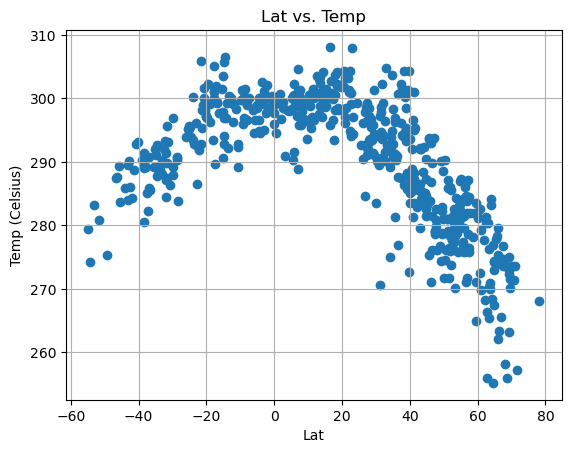

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")
# Incorporate the other graph properties
plt.title("Lat vs. Temp")
plt.ylabel("Temp (Celsius)")
plt.xlabel("Lat")
plt.grid(True)

# Save the figure
plt.savefig

# Show plot
plt.show()



#### Latitude Vs. Humidity

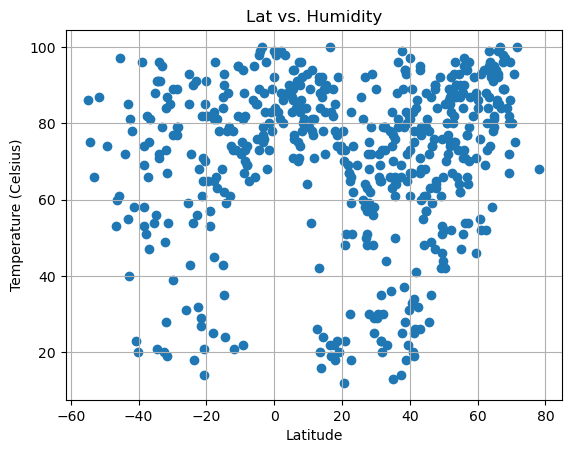

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Lat vs. Humidity" )
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

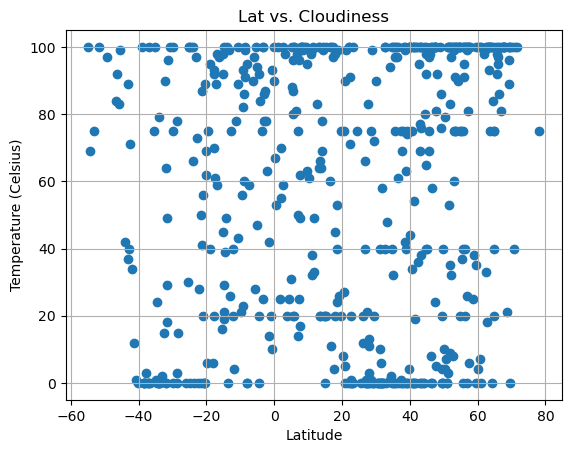

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Lat vs. Cloudiness")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

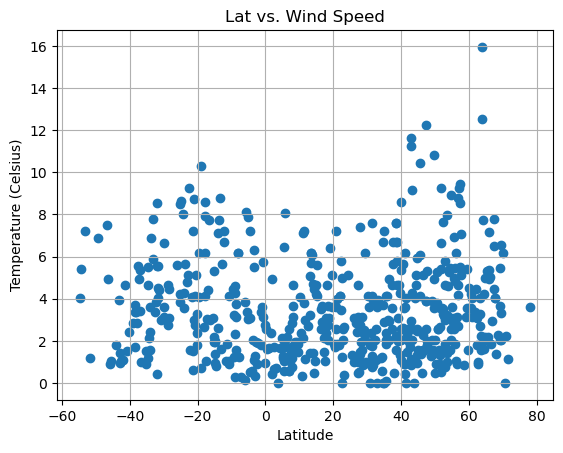

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")


# Incorporate the other graph properties
plt.title("Lat vs. Wind Speed")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

# LL is this the function?

NameError: name 'stats' is not defined

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_data = ({
    "city": cities,
    "lat": lat,
    "max_temp": temp
    "Humidity": humi
    "Cloudiness": cloudy
    "Wind Speed": Wind
    "Country" : location
    "Date": date
})

# Display sample data
northern_hemi_df.head()

# LL check to make sure you're doing dataframe correctly

SyntaxError: invalid syntax (3190620816.py, line 6)

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_data = {
    "City_ID": ID
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data
# Display sample data
southern_hemi_df.head()

#LL need to finish dataframe

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

#LL look at linear regression

In [ ]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#LL - plots to create
#Northern Hemisphere: Temperature vs. Latitude

#Southern Hemisphere: Temperature vs. Latitude

#Northern Hemisphere: Humidity vs. Latitude

#Southern Hemisphere: Humidity vs. Latitude

#Northern Hemisphere: Cloudiness vs. Latitude

#Southern Hemisphere: Cloudiness vs. Latitude

#Northern Hemisphere: Wind Speed vs. Latitude

#Southern Hemisphere: Wind Speed vs. Latitude